<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Homework-Blackbody-Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plank Theory
The Planck theory of thermal radiation tells us that in the
(angular) frequency interval $\omega$ to $\omega+d\omega$, a black body
of unit area radiates electromagnetically an amount of thermal energy per

$
  I(\omega) = {\hbar\over4\pi^2c^2}\,\frac{\omega^3}{(e^{\hbar\omega/k_BT}-1)}.
$

Here $\hbar$ is Planck's constant over $2\pi$, $c$ is the speed of light,
and $k_B$ is Boltzmann's constant.

Integrating this gives the total energy per unit area radiated by a black body as:

$W = {k_B^4 T^4\over4\pi^2c^2\hbar^3} \int_0^\infty \frac{x^3}{e^x-1}\>d x$

##A.

Write a program to evaluate the integral in this expression.  Explain
  what method you used, and how accurate you think your answer is. Feel free to reuse previous code that YOU wrote (as long as you wrote it!).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Define the initial number of slices and the tolerance

In [ ]:
  N_init = 100 
  tolerance = 1e-8

Define the function to be integrated and a function for doing this integration.  Note that I've just copied my adaptive integration scheme from the previous problem (reusing code is encouraged!).

In [ ]:
def f(x):
  return x**3/(np.exp(x)-1)

def iterative_simpson(a,b):
  '''
  Iterative Simpson's alogrithm.  
  Inputs: 
  a: float, start position
  b: float, end position
  calculates on pre-defined function f(x)
  returns: float, integral
  '''
  I_simpson = np.array([0.0])
  N_simpson = [N_init/2]
  tol_simpson = [10*tolerance]
  i = 0
  while tol_simpson[i]>tolerance: 
    i += 1
    N_simpson.append(int(N_simpson[i-1]*2))
    h = (b-a) / N_simpson[i]
    x = np.linspace(a,b,N_simpson[i]+1,endpoint=True) #Note the N+1 is because for N trapezoids, you need N+1 points
    y = f(x)
    integrand = y[0] + y[-1] #add the first and last elements
    for j in range(1,N_simpson[i]):
      if j%2 == 1: 
        integrand += 4 * y[j]
      if j%2 == 0:
        integrand += 2 * y[j]
    integrand *= h/3.0
    I_simpson=np.append(I_simpson,integrand)
    tol_simpson.append(1.0/15.0*np.abs(I_simpson[i]-I_simpson[i-1]))
  return I_simpson[-1]

Calculate the integral for a range from a number close to 0 to a large number.

In [ ]:
iterative_simpson(0.001,500.0)

6.4939394043573015

This is pretty accurate! If you look up this integral in a table you get somethign that is a function of the "gamma" and "zeta" functions.  To see the exact results, you can use the code below:

In [ ]:
from scipy.special import gamma,zeta
gamma(4)*zeta(4)

6.493939402266829

Here I used the iterative Simpson's rule and asked for an accuracy of 1*10^-8.  That should be pretty accurate with minimal computational cost. You can see how close that is by comparing the exact value that I looked up to the approximate one above.

##B.

Use the program you wrote in part A to plot the total energy per unit area as a function of $T$ from $0 K\leq T \leq 5000 K$.

First define a bunch of constants:

In [ ]:
k_b = 1.380649e-23 #units J/K
h_bar = 1.05457e-34 # units J*s
c = 3.0e8 # units m/s

For a range of temperatures, calculate the total energy per area.  Then plot the results. 

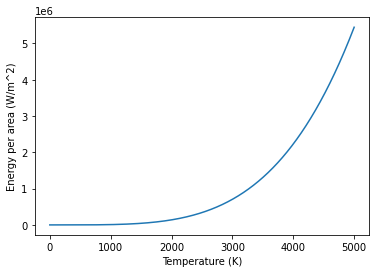

In [ ]:
T = np.arange(0,5000)
integral = iterative_simpson(.0001,500.0)
W = k_b**4 * T**4 / (4 * np.pi**2 * c**2 * h_bar**3)
plt.plot(T,W)
plt.xlabel("Temperature (K)")
plt.ylabel("Energy per area (W/m^2)")
plt.show()

##C. 
Even before Planck gave his theory of thermal radiation around the
  turn of the 20th century, it was known that the total energy $W$ given
  off by a black body per unit area per second followed Stefan's
  law: $W = \sigma T^4$, where $\sigma$ is the Stefan--Boltzmann constant.
  Use your value for the integral above to compute a value for the
  Stefan--Boltzmann constant (in SI units) to three significant figures.
  Check your result against the known value, which you can find in books or
  on-line.  You should get good agreement.

In [ ]:
sb_constant  = k_b**4  / (4 * np.pi**2 * c**2 * h_bar**3) * iterative_simpson(.00001,500.0)
print("The Stefan-Boltzmann constant is calculated as:", sb_constant, "W /(K^4 * m^2)")

The Stefan-Boltzmann constant is calculated as: 5.662560809165198e-08 W /(K^4 * m^2)


Looking up the actual value and computing the percent error gives

In [ ]:
sb_actual =  5.670374419e-8 # units W*K^-4 * m^-2
error=np.abs(sb_constant-sb_actual)/sb_actual*100
print("The actual value is:", sb_actual, "W /(K^4 * m^2) for a percent error of:", error)

The actual value is: 5.670374419e-08 W /(K^4 * m^2) for a percent error of: 0.13779707048304915


That's pretty good!

#Grading (50 points)

* 10 points: Part A: Did you write an easy to follow program?  That includes easy to follow variable names, and comments.
* 5 points: Part A: Did you provide some discussion about the accuracy of your method and why you chose it?
* 15 points: Part B: Does your code work and produce the correct result?
* 10 points: Do you have proper values for all of your constants, along with the associated units listed? And does your graph have the proper units on it?
* 5 points: Part C: Did you properly calculate the SB constant, along with printing the correct units?
* 5 points: Part C: Did you look up the actual value for the SB constant?